In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [4]:
df = pd.read_csv('D:\shahd file\social_media_engagement1.csv')
print(df.head())

   post_id   platform post_type        post_time  likes  comments  shares  \
0        1   Facebook     image  8/17/2023 14:45   2121       474     628   
1        2   Facebook  carousel   5/14/2023 0:45   3660       432     694   
2        3  Instagram      poll  2/21/2023 16:15   4955       408     688   
3        4    Twitter     image  11/16/2023 0:45   1183        90     187   
4        5    Twitter     video   5/23/2023 0:30   3499       247     286   

   post_day sentiment_score  
0  Thursday        positive  
1    Sunday         neutral  
2   Tuesday        negative  
3  Thursday        negative  
4   Tuesday        positive  


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\shahd\AppData\Local\Temp\ipykernel_6540\3158285666.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('D:\shahd file\social_media_engagement1.csv')


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB
None


In [6]:
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)

Missing values:
 post_id            0
platform           0
post_type          0
post_time          0
likes              0
comments           0
shares             0
post_day           0
sentiment_score    0
dtype: int64


In [9]:
df['post_time'] = pd.to_datetime(df['post_time'])
df['post_hour'] = df['post_time'].dt.hour
df['post_month'] = df['post_time'].dt.month
df['post_weekday'] = df['post_time'].dt.day_name()
df['engagement'] = df['likes'] + df['comments'] + df['shares']

In [10]:
label_cols = ['platform', 'post_type', 'post_day', 'sentiment_score']
for col in label_cols:
    df[col + '_num'] = LabelEncoder().fit_transform(df[col])


In [11]:
scaler = MinMaxScaler()
df[['likes_scaled', 'comments_scaled', 'shares_scaled']] = scaler.fit_transform(
    df[['likes', 'comments', 'shares']]
)

In [13]:
Q1 = df['engagement'].quantile(0.25)
Q3 = df['engagement'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr_filtered = df[(df['engagement'] >= lower_bound) & (df['engagement'] <= upper_bound)]



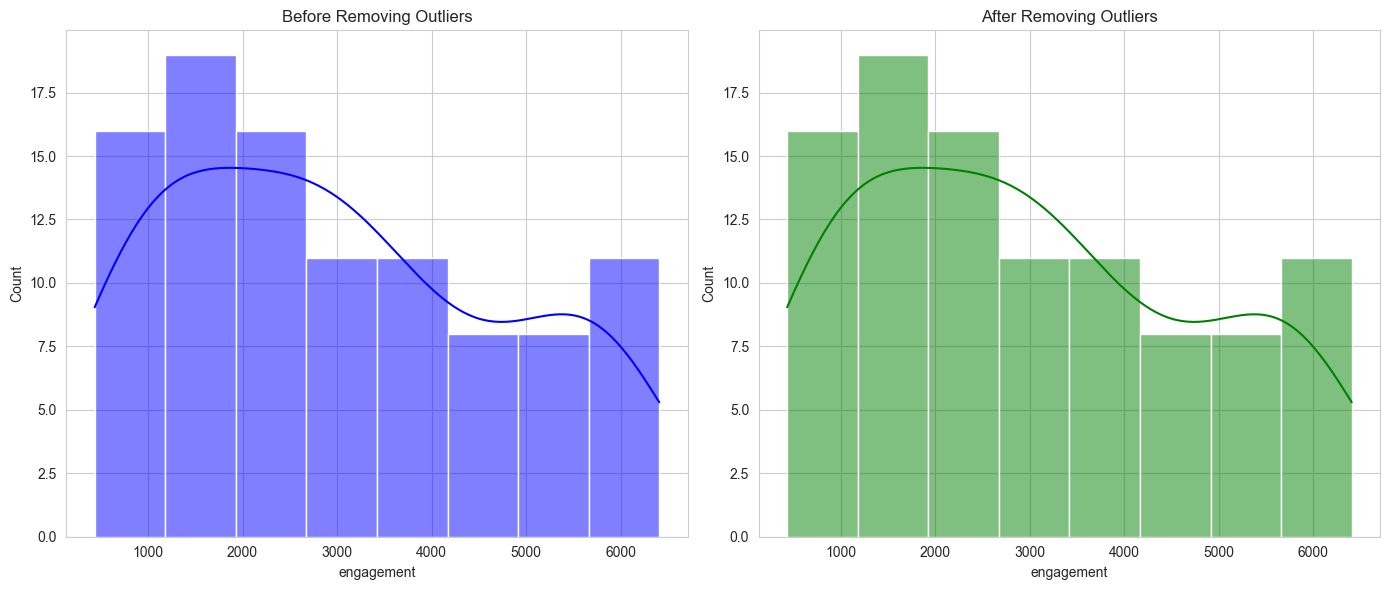

In [ ]:
plt.figure(figsize=(14, 6))  
plt.subplot(1, 2, 1)  
sns.histplot(df['engagement'], kde=True, color='blue')
plt.title('Before Removing Outliers')

plt.subplot(1, 2, 2)  
sns.histplot(df_iqr_filtered['engagement'], kde=True, color='green')
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

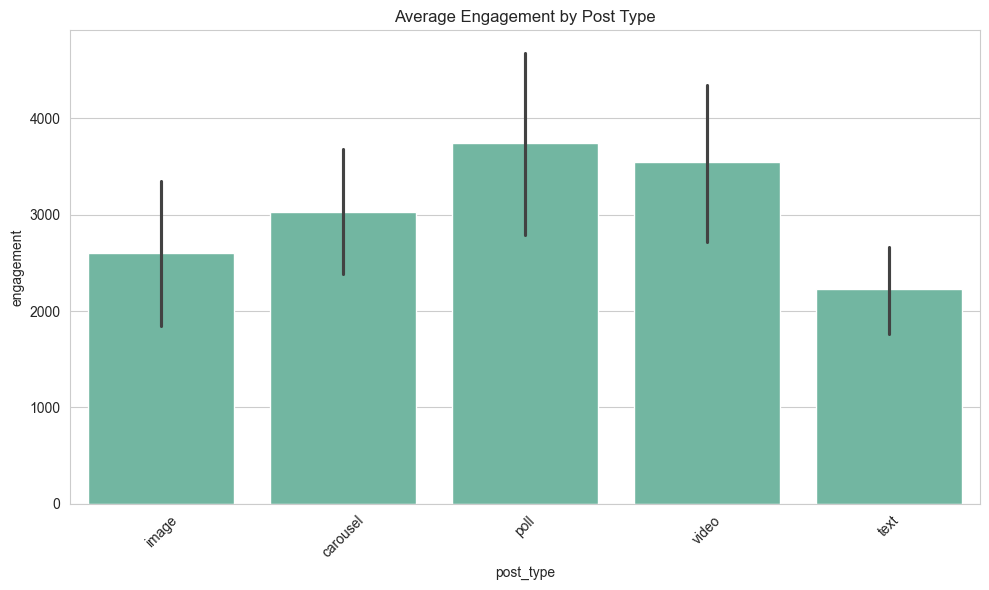

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='post_type', y='engagement', estimator=np.mean)
plt.title("Average Engagement by Post Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



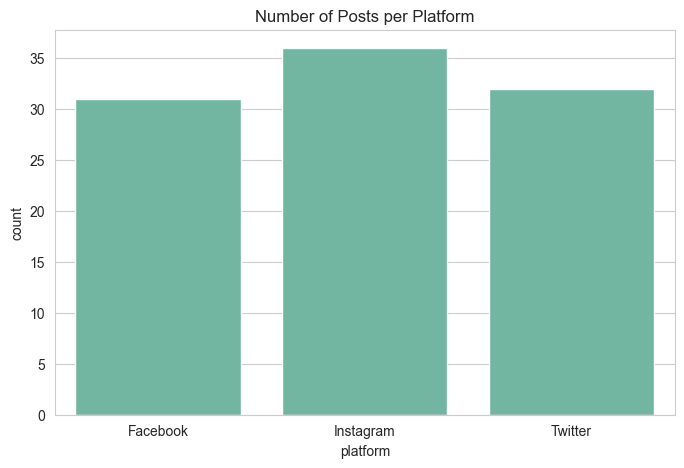

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='platform')
plt.title("Number of Posts per Platform")
plt.show()

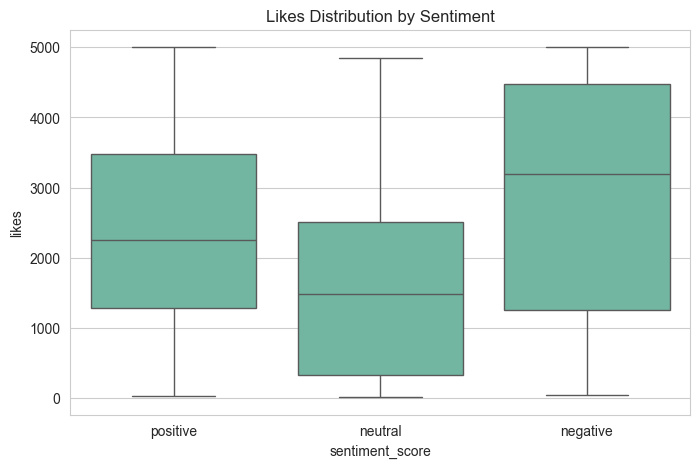

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sentiment_score', y='likes')
plt.title("Likes Distribution by Sentiment")
plt.show()

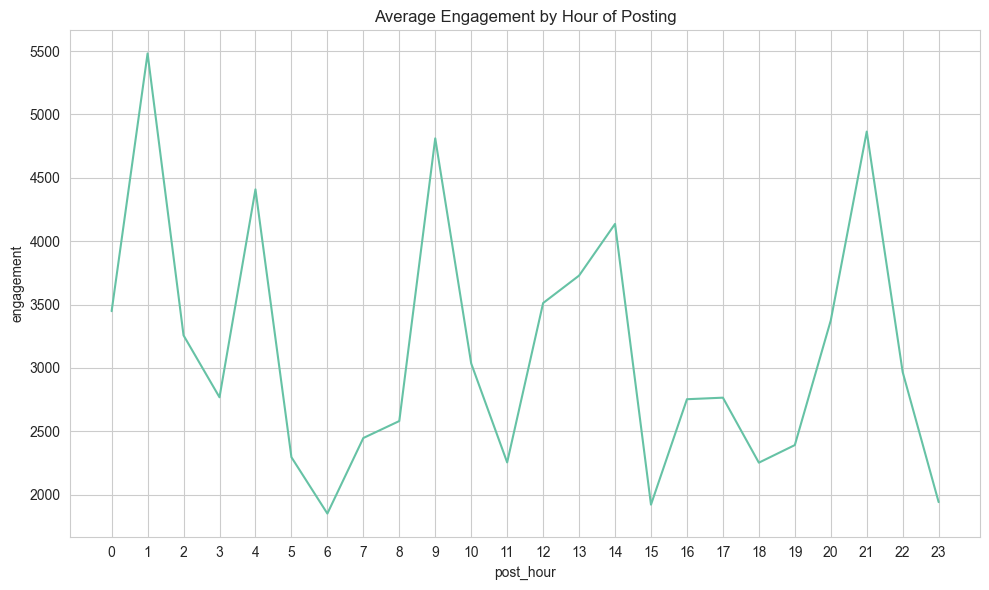

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.groupby('post_hour')['engagement'].mean().reset_index(), x='post_hour', y='engagement')
plt.title("Average Engagement by Hour of Posting")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

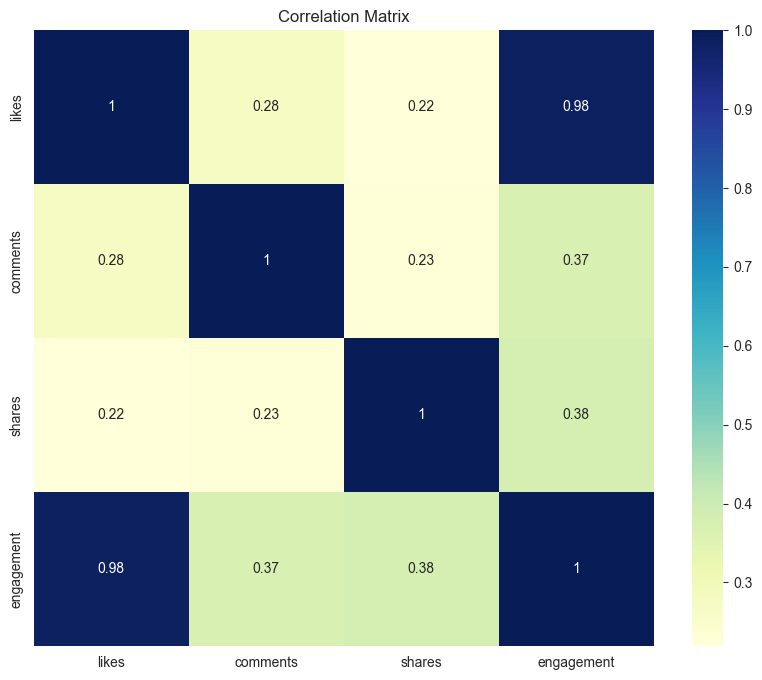

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['likes', 'comments', 'shares', 'engagement']].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

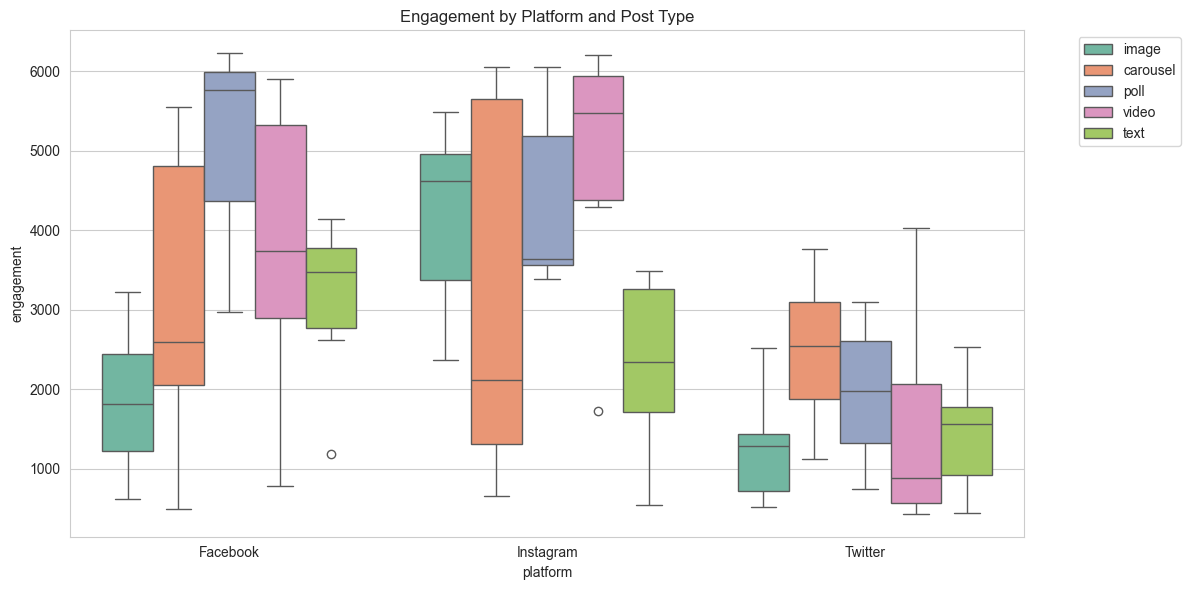

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='platform', y='engagement', hue='post_type')
plt.title("Engagement by Platform and Post Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

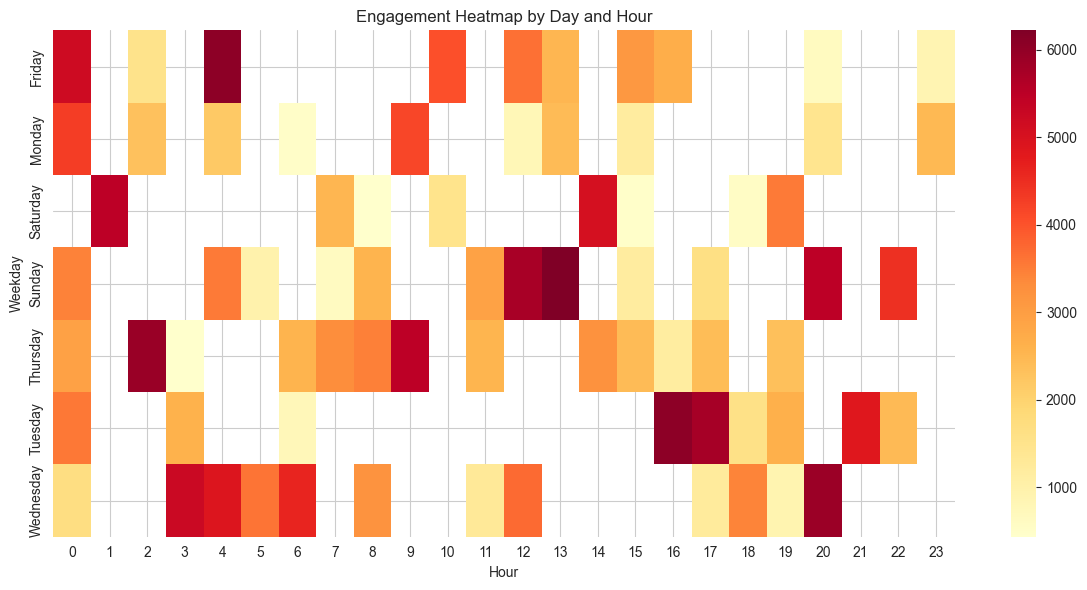

In [26]:
heatmap_data = df.groupby(['post_weekday', 'post_hour'])['engagement'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd")
plt.title("Engagement Heatmap by Day and Hour")
plt.xlabel("Hour")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()

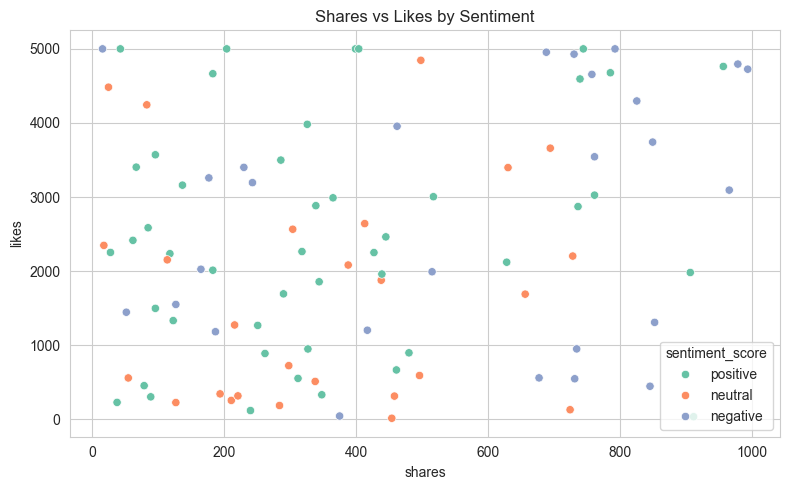

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='shares', y='likes', hue='sentiment_score')
plt.title("Shares vs Likes by Sentiment")
plt.tight_layout()
plt.show()

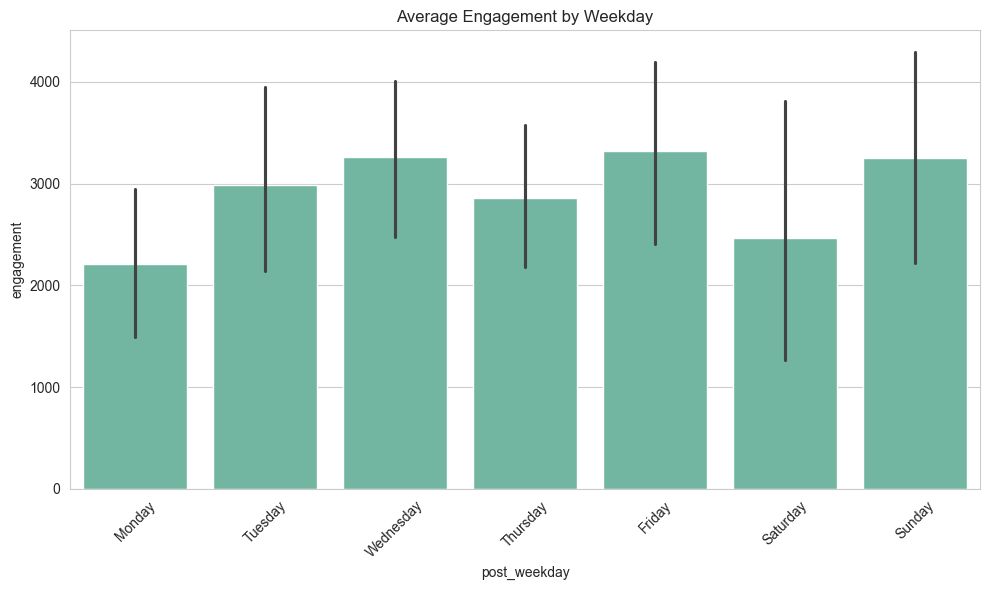

In [28]:
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df, x='post_weekday', y='engagement', order=order)
plt.title("Average Engagement by Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

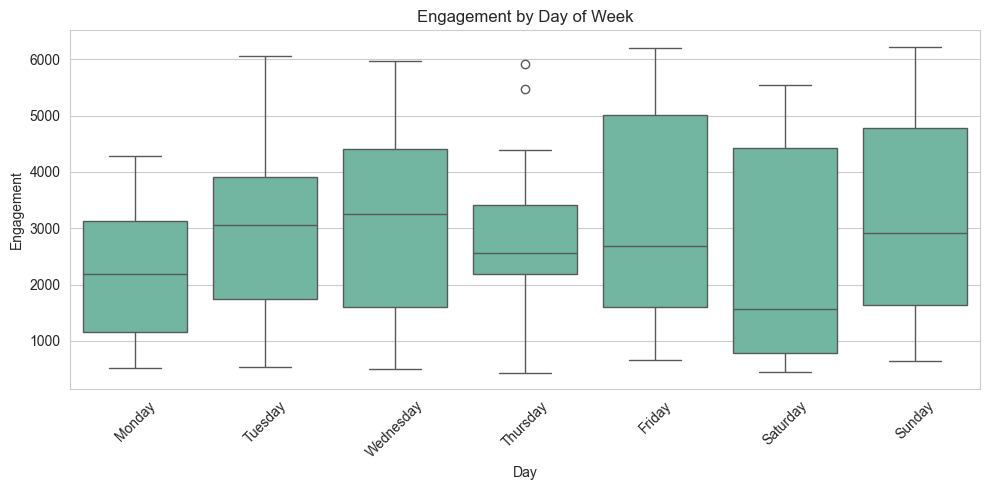

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='post_weekday', y='engagement', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Engagement by Day of Week')
plt.xlabel('Day')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

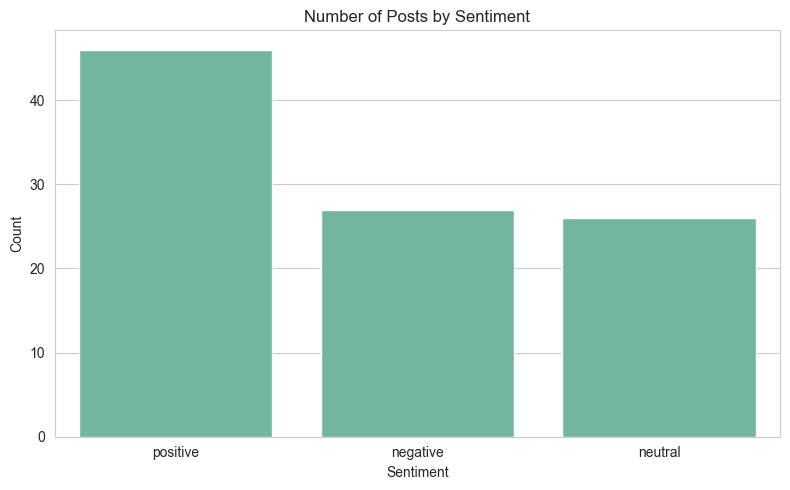

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_score', order=df['sentiment_score'].value_counts().index)
plt.title('Number of Posts by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()